## Data Mining and Machine Learning
##  Multidimensional visualization: Parallel plot coordinates and radviz
### Edgar Acuna
### October 2021

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates 
from pandas.plotting import radviz
from sklearn.preprocessing import StandardScaler

In [24]:
#Leyendo el dataset wine  de la UCI
wine_data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")
winen = StandardScaler().fit_transform(wine_data.iloc[:,0:14])
winen=pd.DataFrame(winen)
winen['quality']=wine_data['quality']

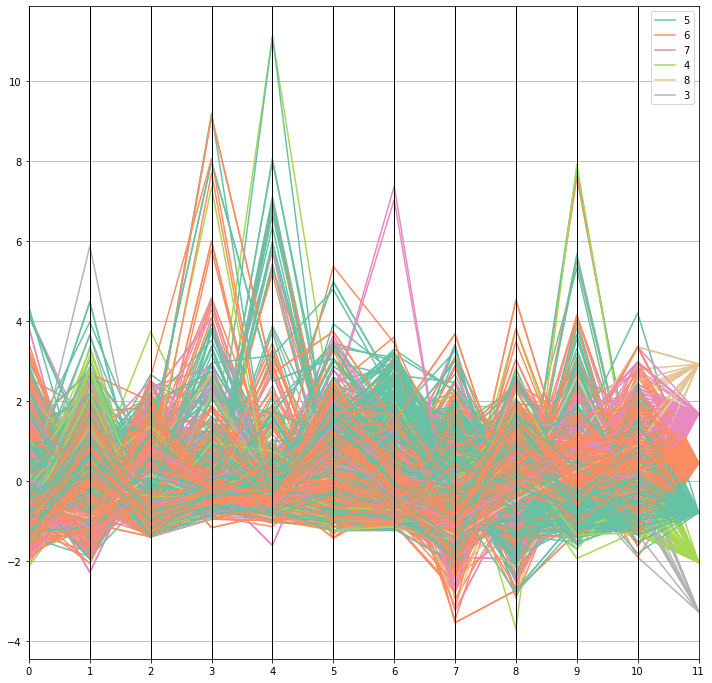

In [25]:
plt.figure(figsize=(12,12))
parallel_coordinates(winen, 'quality', colormap=plt.get_cmap("Set2"))
plt.show()

In [26]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


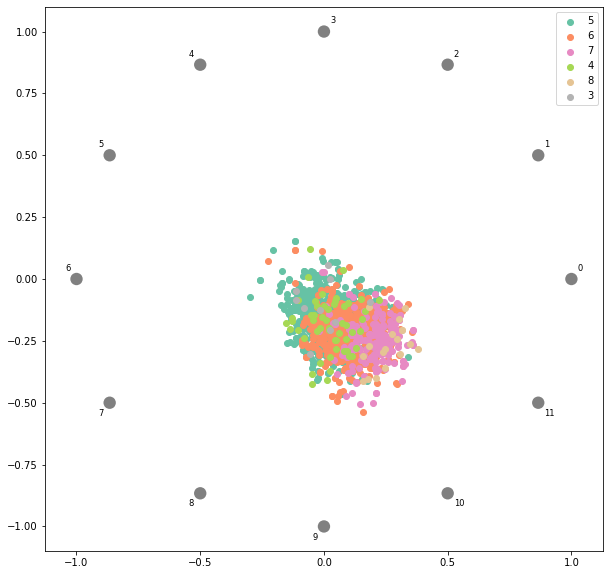

In [27]:
plt.figure(figsize=(10,10))
radviz(winen, 'quality',colormap=plt.get_cmap("Set2"))
plt.show()

In [28]:
import plotly
import plotly.graph_objs as go

import pandas as pd 
plotly.offline.init_notebook_mode(connected=True)
df = wine_data

data = [
    go.Parcoords(
        line = dict(color = df['quality']),
        dimensions = list([
            dict(range = [4.6,15.9],
 #               constraintrange = [4,8],
                label = 'fixed acidity', values = df['fixed acidity']),
            dict(range = [0.12,1.58],
                label = 'volatile acidity', values = df['volatile acidity']),
            dict(range = [0,1],
                label = 'citric acid', values = df['citric acid']),
            dict(range = [0.9,15.5],
                label = 'residual sugar', values = df['residual sugar']),
            dict(range = [0.012,.611],
                label = 'chlorides', values = df['chlorides']),
            dict(range = [1,72],
                label = 'free sulfur dioxide', values = df['free sulfur dioxide']),
            dict(range = [6,289],
                label = 'total sulfur dioxide', values = df['total sulfur dioxide']),
            dict(range = [0.99,1.04],
                label = 'density', values = df['density']),
            dict(range = [2.74,4.01],
                label = 'pH', values = df['pH']),
            dict(range = [0.33,2],
                label = 'sulphates', values = df['sulphates']),
            dict(range = [8.4,14.9],
                label = 'alcohol', values = df['alcohol'])
        ])
    )
]

layout = go.Layout(
    plot_bgcolor = '#E5E5E5',
    paper_bgcolor = '#E5E5E5'
)

fig = go.Figure(data = data, layout = layout)
plotly.offline.iplot(fig, filename = 'parcoords-basic')